# Prediction of Apple Inc. stocks price with LSTM

Program uses artificial recurrent neural network called Long Tern Memory (LSTM) to predict the closing price of a company usinf the past 60 days stock price.

In [2]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [32]:
# Setting path
import sys
path = sys.path.append('/content/drive/My Drive/Colab Notebooks/Stock Price Prediction')


In [33]:
# importing libraries
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Getting Data with `pandas_datareader`

In [34]:
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [59]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792


## Plotting Close Price History

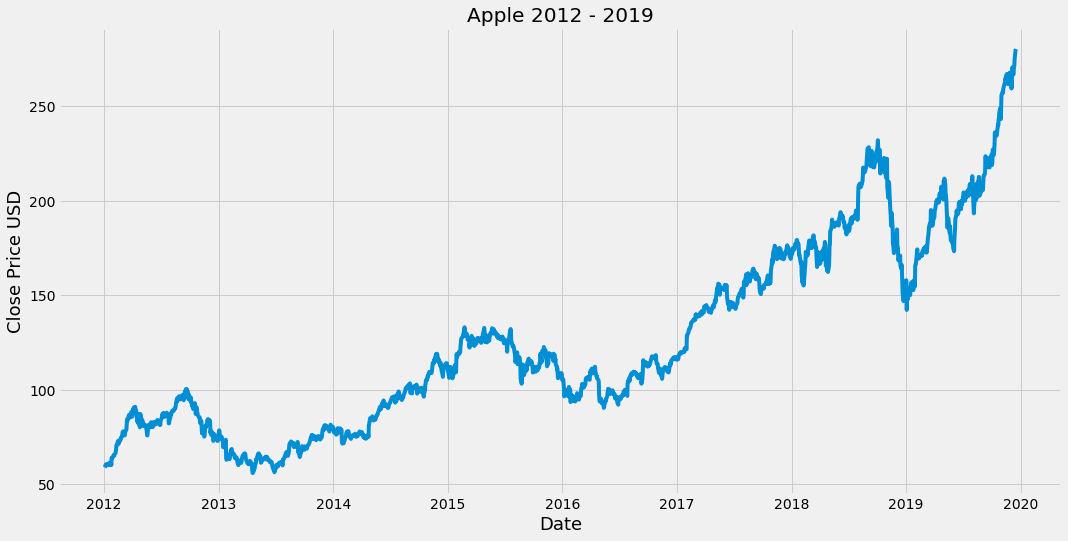

In [60]:
#Plotting with MatplotLib
plt.figure(figsize=(16,8))
plt.title('Apple 2012 - 2019')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

## Creating new DF with the column Close

In [61]:
# Creating DF with colum 'Close'
data = df.filter(['Close'])

# Covert DF to a numpy array
dataset = data.values

# Get the number of rows to train the module
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1603

## Data Normalization

In [62]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

## Training Data

In [ ]:
# Creating training dataset
# Creating the scaled trainig data set
train_data = scaled_data[0:training_data_len, :]

# Split the data between x and y train data sets
x_train = []
y_train = []

# Separete first 60 items for x_train and the 61 for y_train
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()


### Covert to Numpy array

In [64]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping Data

In [65]:
# Reshape de Data for 3 dimensions, once LSTM needs it
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))    # (num of samples/rows, time steps, features)
x_train.shape

(1543, 60, 1)

### Building LSTM model

In [66]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [67]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

### Training Model

In [68]:
# Train Model
model.fit(x_train, y_train, 
          batch_size=1,    # batch size: total number of training examples present in a single batch 
          epochs=1)        # epochs: number of iterations when an entire dataset is passed foward and backward through a neural network


                                            

Epoch 1/1
1543/1543 [==============================] - 63s 41ms/step - loss: 8.1288e-04


## Test Data

In [69]:
# Creating Test Data set
# Creating a new array containing scaled values from index 2543 to 2003
test_data = scaled_data[training_data_len -60 : , :]
#Creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])

### Corvert to numpy array

In [70]:
#Convert data to numpy array
x_test = np.array(x_test)

### Reshaping Data

In [71]:
# Reshaping to 3 dimension
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))    # (num of samples/rows, time steps, features)
x_test.shape

(400, 60, 1)

### Getting models prediction price values



In [72]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

### Getting the root mean squared error (RMSE)

In [73]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

7.301014862060547

## Plotting results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


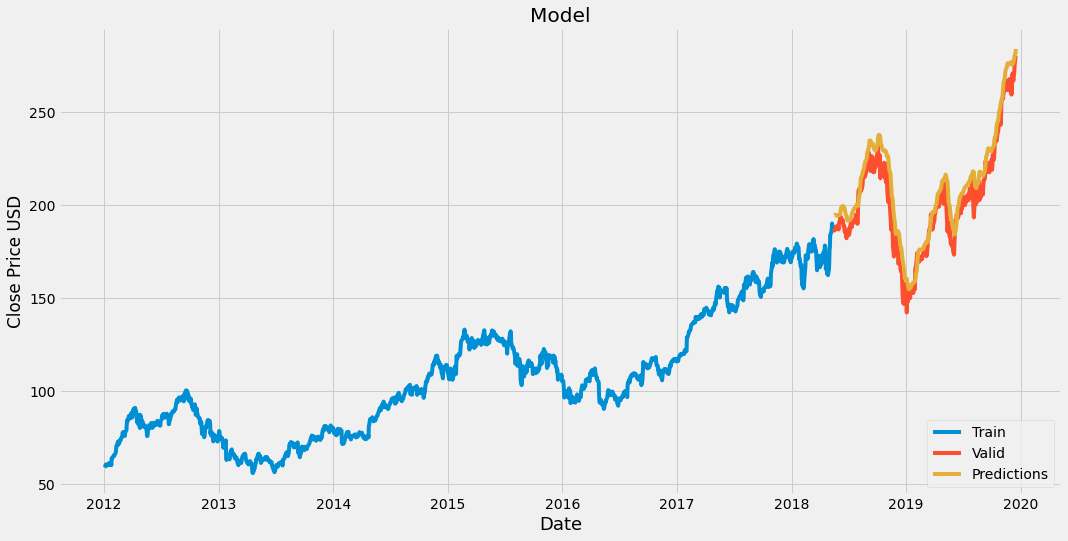

In [74]:
# Plot data
train = data[ : training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions
# Visualize data
plt.figure(figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD')

# Selecting Data
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()

In [75]:
# Comparing valid and predicted prices
valid.head()

,Close,Predictions
Date,,
2018-05-17,186.990005,194.693665
2018-05-18,186.309998,194.787476
2018-05-21,187.630005,194.589035
2018-05-22,187.160004,194.447739
2018-05-23,188.360001,194.282562


## Predicting a new day

In [94]:
# Get quote
apple_quote = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create DF
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price values and covert the df to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Covert X_test to a numpy array
X_test = np.array(X_test)
# Rashape Test Data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predict scaled price
pred_price = model.predict(X_test)
# Undoing Scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[286.23315]], dtype=float32)

In [ ]:
# Get the last 60 days closing price values and covert the df to an array
last_60_days = new_df[-60:].values
last_60_days

In [ ]:
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
last_60_days_scaled

In [ ]:
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
X_test

In [ ]:
# Covert X_test to a numpy array
X_test = np.array(X_test)
X_test

In [ ]:
# Rashape Test Data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

In [100]:
# Get the predict scaled price
pred_price = model.predict(X_test)
pred_price

array([[1.0259244]], dtype=float32)

In [101]:
# Undoing Scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[286.23315]], dtype=float32)